In [154]:
# Data Analysis on Bank Data in determining if a customer will purchase a product or service
# based on their demographic location or behavioral traits

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import tree

# Load the CSV file with the correct delimiter
bank_data = pd.read_csv('Data/bank-full.csv', delimiter=';')

In [155]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [156]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [157]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: xlabel='contact', ylabel='count'>

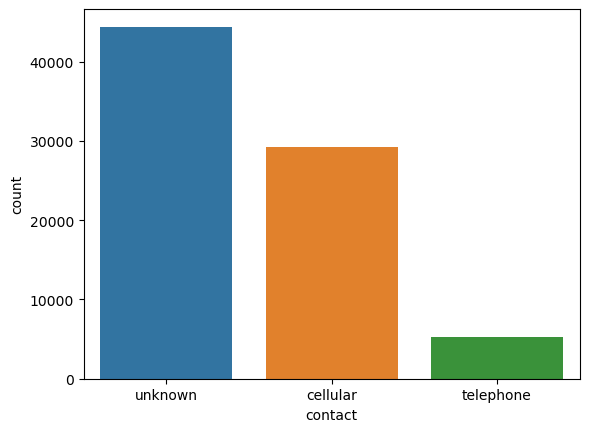

In [158]:
sns.countplot(data=bank_data, x='default')
sns.countplot(data=bank_data, x='marital')


sns.countplot(data=bank_data, x='contact')


In [159]:
print((bank_data['education'].value_counts()/4521)*100)

education
secondary    513.205043
tertiary     294.204822
primary      151.537271
unknown       41.074983
Name: count, dtype: float64


In [160]:
X_train = bank_data.drop(columns='y')
y_train = bank_data['y']

print("The shape of the feature matrix: ", X.shape)
print("The shape of the target vector: ", y.shape)


The shape of the feature matrix:  (45211, 16)
The shape of the target vector:  (45211,)


In [161]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [162]:
# Define the column Trasformation 
preprocessor = ColumnTransformer (
    transformers = [
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

In [163]:
# Define the model 
model = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5))
])

In [164]:
# Train the model 
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=5,
                                        random_state=100))])

In [167]:
# Define the parameter grid for Grid Search
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Define the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, scoring='accuracy')

# Train the model using Grid Search
grid_search.fit(X_train, y_train)

# Display the best parameters found by Grid Search
print(f'Best parameters found: {grid_search.best_params_}')

Best parameters found: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}


In [168]:
# Load test file 
test_data = pd.read_csv('Data/bank.csv', delimiter=';')

In [169]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [170]:
# Separate features and Targert variable columns 
X_test = test_data.drop(columns='y')
y_test = test_data['y']

In [171]:
# Predict on the test set using the best model from Grid Search
best_model = grid_search.best_estimator_
# Model Prediction 
y_pred = model.predict(X_test)

In [172]:
# Evaluation of the model 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy {accuracy*100:.2f}')

Accuracy 89.96


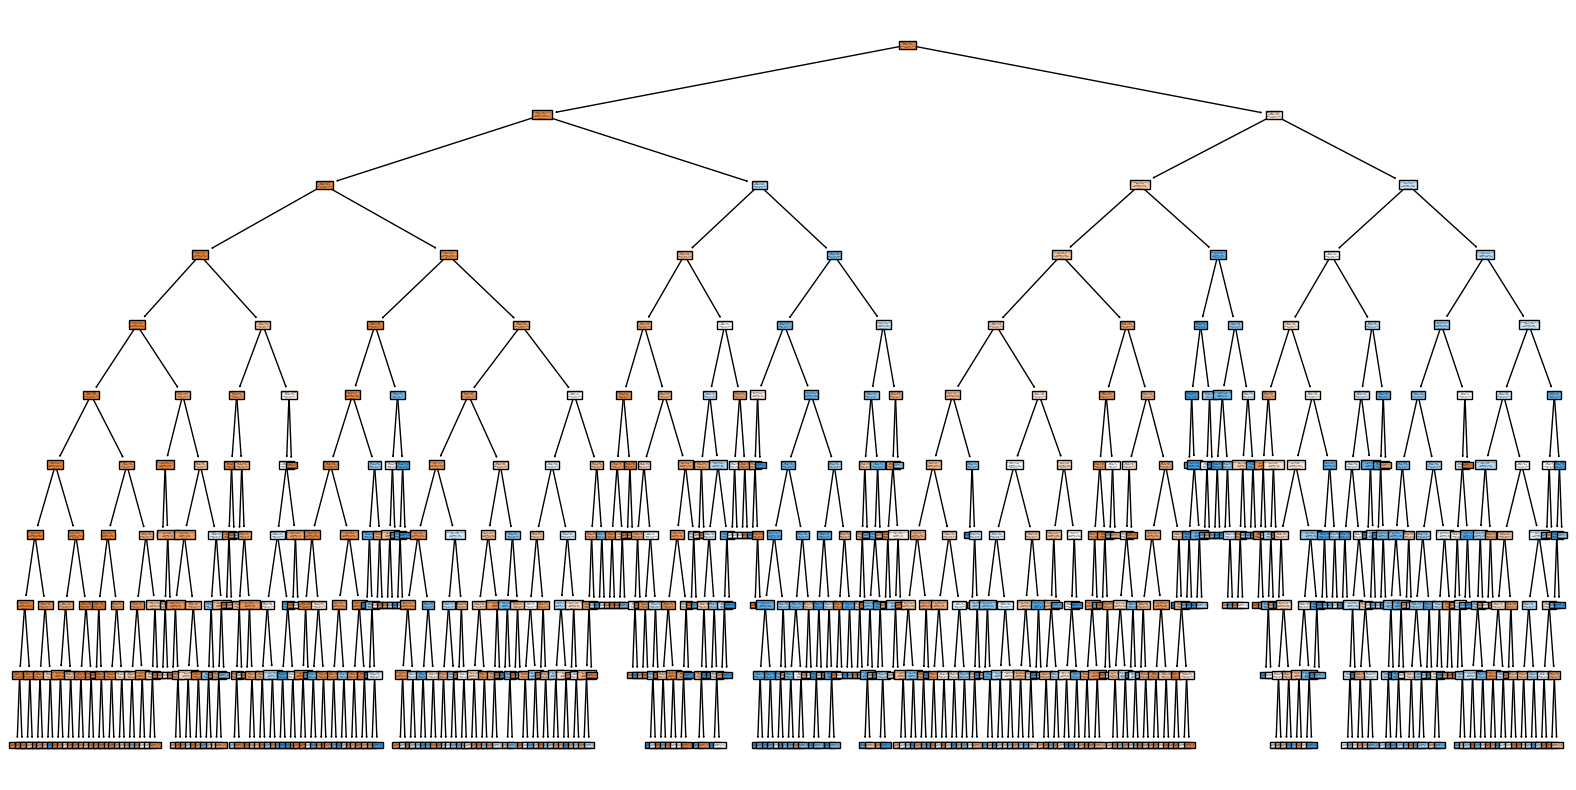

In [173]:
# Extract feature names after preprocessing
num_features = numerical_cols.tolist()
cat_features = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols).tolist()
feature_names = num_features + cat_features

# Optional: Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_model.named_steps['classifier'], filled=True, feature_names=feature_names, class_names=['no', 'yes'])
plt.show()

Interpreting the Decision Tree Plot
Nodes and Splits:

Each internal node represents a decision based on a feature.
Each node splits into branches based on the feature's value, creating a binary decision process.
The root node is at the top and represents the initial split.
Leaf Nodes:

The leaf nodes (at the bottom) represent the final decision or class label.
Each leaf node shows the predicted class and can also display the proportion of samples that fall into each class.
Colors:

The colors of the nodes typically indicate the majority class (e.g., orange for 'no', blue for 'yes').
The intensity of the color represent the purity of the node, i.e., how strongly the samples in that node belong to one class.


# Other visualized plot to interpret results 

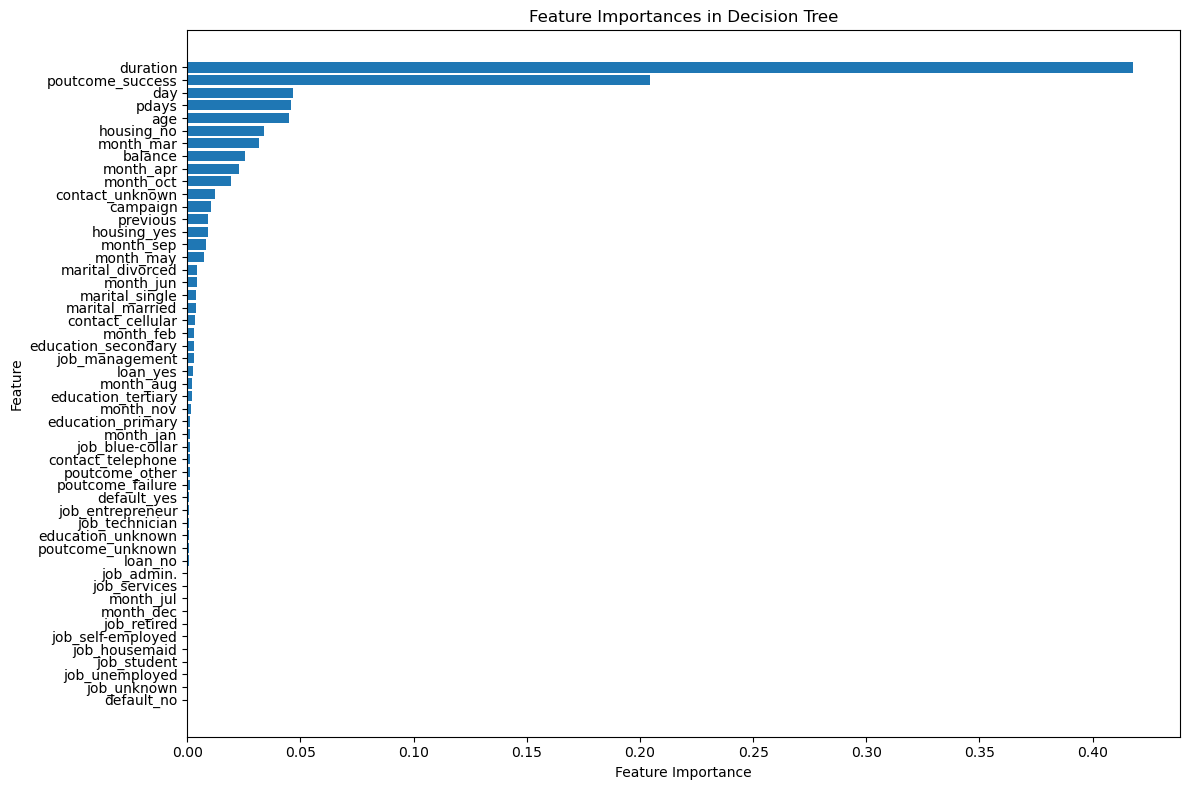

In [177]:
# Extract feature importances and feature names
feature_importances = best_model.named_steps['classifier'].feature_importances_
features = feature_names

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[indices]
sorted_features = [features[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

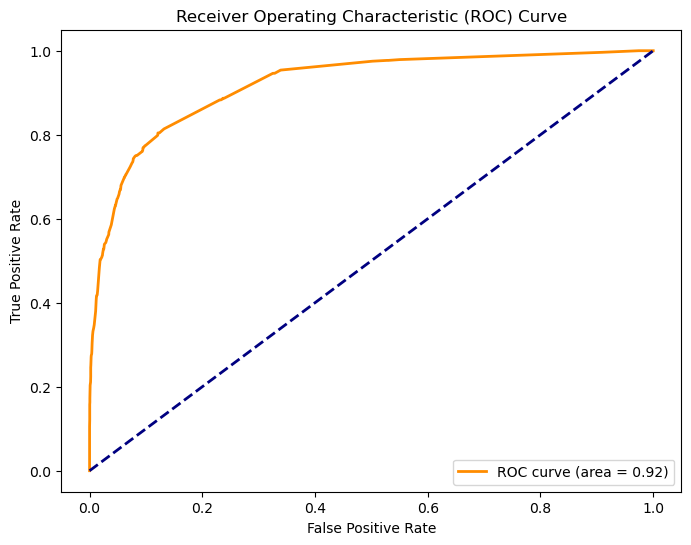

In [178]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='yes')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


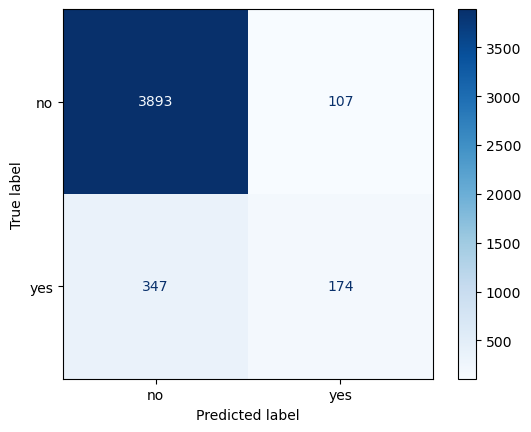

In [176]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap=plt.cm.Blues)
plt.show()
